In [6]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np 
import matplotlib as plt
pd.set_option('display.max_columns', None)

In [58]:
Data2018 = pd.read_csv('2018.csv')
Data2019 = pd.read_csv('2019.csv')
Data2020 = pd.read_csv('2020.csv')
Data2021 = pd.read_csv('2021.csv')

MeregeYears = [Data2018,Data2019,Data2020,Data2021]

AllData = pd.concat(MeregeYears)

DroppedParameters = AllData.drop(['killsat10','assistsat10','opp_killsat10','opp_assistsat10','deathsat10','opp_deathsat10','killsat15','assistsat15','opp_killsat15','opp_assistsat15','deathsat15','opp_deathsat15','url','gameid','date','patch','split','year','playerid','game','playoffs','ban1','ban2','ban3','ban4','ban5','champion','firstdragon','opp_dragons','elementaldrakes','opp_elementaldrakes','infernals','mountains','clouds','oceans','pentakills','quadrakills','triplekills','team kpm','dragons (type unknown)','opp_elders','dragons','elders','opp_elders','firstherald','heralds','opp_heralds','firstbaron','barons','opp_barons','firsttower','towers','opp_towers','firstmidtower','firsttothreetowers','inhibitors','opp_inhibitors','damagemitigatedperminute','gspd','vspm','visionscore','teamkills','teamdeaths','doublekills','ckpm','wpm','wcpm','cspm','earned gpm'], axis = 1)
DroppedParameters = DroppedParameters[DroppedParameters['datacompleteness'] == 'complete']
DroppedParameters = DroppedParameters.drop(['datacompleteness'],axis = 1)
DroppedParameters['side'] = DroppedParameters['side'].replace({'Red':1,'Blue':0})
DroppedParameters = DroppedParameters[ (DroppedParameters['league'] == 'LCS') | (DroppedParameters['league'] == 'LEC') | (DroppedParameters['league'] == 'LCK') | (DroppedParameters['league'] == 'LPL') | (DroppedParameters['league'] == 'TCL') | (DroppedParameters['league'] == 'CBLOL')| (DroppedParameters['league'] == 'OPL')]
Big14 = DroppedParameters[DroppedParameters['position'] != 'team']

df = Big14

df = pd.concat([df,pd.get_dummies(df['league'],prefix = 'league')],axis =1)
df = pd.concat([df,pd.get_dummies(df['position'],prefix = 'position')],axis =1)
df = df.drop(['league','position'],axis = 1)
df = df.reset_index()
df['gamenumber'] = df.apply(lambda _: 0, axis=1)
PlayerDict = {}
for ind in df.index:
    if df['player'][ind] not in PlayerDict:
        PlayerDict[df['player'][ind]] = 1
        df['gamenumber'][ind] = PlayerDict[df['player'][ind]]
    else:
        PlayerDict[df['player'][ind]] += 1
        df['gamenumber'][ind] = PlayerDict[df['player'][ind]]
    

 



In [59]:
df.head(10)

,index,side,player,team,gamelength,result,kills,deaths,assists,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,damagetochampions,dpm,damageshare,damagetakenperminute,wardsplaced,wardskilled,controlwardsbought,totalgold,earnedgold,earnedgoldshare,goldspent,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,league_CBLOL,league_LCK,league_LCS,league_LEC,league_LPL,league_OPL,league_TCL,position_bot,position_jng,position_mid,position_sup,position_top,gamenumber
0,348,0,Duke,Invictus Gaming,1590,1,3,1,3,1.0,0.0,1.0,0.0,9631,363.4340,0.150020,315.4340,13,6,2,10791,7272,0.188550,8870.0,218.0,216.0,2,1,0,3292.0,4758.0,90.0,3287.0,4640.0,88.0,5.0,118.0,2.0,5280.0,7775.0,150.0,5060.0,7477.0,144.0,220.0,298.0,6.0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,349,0,Ning,Invictus Gaming,1590,1,3,0,5,1.0,1.0,0.0,0.0,6924,261.2830,0.107854,693.8113,48,24,10,10831,7312,0.189587,9775.0,194.0,36.0,158,96,8,3170.0,3745.0,67.0,2988.0,3386.0,58.0,182.0,359.0,9.0,4660.0,5588.0,100.0,4290.0,4957.0,80.0,370.0,631.0,20.0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,350,0,Rookie,Invictus Gaming,1590,1,3,1,8,1.0,0.0,1.0,0.0,19985,754.1509,0.311303,274.6415,10,7,5,12165,8646,0.224176,9310.0,266.0,246.0,20,16,4,3633.0,5236.0,108.0,3378.0,5108.0,92.0,255.0,128.0,16.0,5389.0,7541.0,157.0,5211.0,8079.0,150.0,178.0,-538.0,7.0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,351,0,JackeyLove,Invictus Gaming,1590,1,3,1,7,1.0,0.0,1.0,0.0,23623,891.4340,0.367971,321.2075,14,6,2,14028,10509,0.272482,13075.0,276.0,257.0,19,8,11,3992.0,3286.0,97.0,3438.0,3018.0,88.0,554.0,268.0,9.0,6800.0,5569.0,159.0,5138.0,5263.0,134.0,1662.0,306.0,25.0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,352,0,Baolan,Invictus Gaming,1590,1,0,1,9,1.0,0.0,1.0,0.0,4035,152.2642,0.062852,375.6604,32,8,11,8348,4829,0.125205,7025.0,84.0,84.0,0,0,0,2211.0,2815.0,26.0,2252.0,2930.0,24.0,-41.0,-115.0,2.0,3449.0,4046.0,45.0,3220.0,3574.0,30.0,229.0,472.0,15.0,0,0,0,0,1,0,0,0,0,0,1,0,1
5,353,1,Letme,Royal Never Give Up,1590,0,0,3,1,0.0,0.0,0.0,0.0,3744,141.2830,0.151837,813.8868,12,1,2,8144,4625,0.198925,8100.0,214.0,214.0,0,0,0,3287.0,4640.0,88.0,3292.0,4758.0,90.0,-5.0,-118.0,-2.0,5060.0,7477.0,144.0,5280.0,7775.0,150.0,-220.0,-298.0,-6.0,0,0,0,0,1,0,0,0,0,0,0,1,1
6,354,1,Karsa,Royal Never Give Up,1590,0,0,3,4,0.0,0.0,0.0,0.0,3443,129.9245,0.139630,737.0189,65,20,12,7298,3779,0.162536,6715.0,119.0,34.0,85,66,0,2988.0,3386.0,58.0,3170.0,3745.0,67.0,-182.0,-359.0,-9.0,4290.0,4957.0,80.0,4660.0,5588.0,100.0,-370.0,-631.0,-20.0,0,0,0,0,1,0,0,0,1,0,0,0,1
7,355,1,Xiaohu,Royal Never Give Up,1590,0,2,1,2,0.0,0.0,0.0,0.0,7931,299.2830,0.321640,610.6038,13,6,2,9375,5856,0.251873,8700.0,239.0,217.0,22,18,0,3378.0,5108.0,92.0,3633.0,5236.0,108.0,-255.0,-128.0,-16.0,5211.0,8079.0,150.0,5389.0,7541.0,157.0,-178.0,538.0,-7.0,0,0,0,0,1,0,0,0,0,1,0,0,1
8,356,1,Able,Royal Never Give Up,1590,0,2,3,2,0.0,0.0,0.0,1.0,5597,211.2075,0.226985,457.0566,7,6,1,10050,6531,0.280907,9675.0,248.0,227.0,21,20,0,3438.0,3018.0,88.0,3992.0,3286.0,97.0,-554.0,-268.0,-9.0,5138.0,5263.0,134.0,6800.0,5569.0,159.0,-1662.0,-306.0,-25.0,0,0,0,0,1,0,0,1,0,0,0,0,1
9,357,1,Ming,Royal Never Give Up,1590,0,0,2,4,0.0,0.0,0.0,0.0,3943,148.7925,0.159908,557.2453,28,12,9,5978,2459,0.105759,5625.0,55.0,55.0,0,0,0,2252.0,2930.0,24.0,2211.0,2815.0,26.0,41.0,115.0,-2.0,3220.0,3574.0,30.0,3449.0,4046.0,45.0,-229.0,-472.0,-15.0,0,0,0,0,1,0,0,0,0,0,1,0,1


In [60]:
# df.to_csv(r'.\GameAmounts.csv')
PlayerStats = df

In [61]:
PlayerStatDict = {}
for ind in PlayerStats.index:
    if df['player'][ind] not in PlayerStatDict:
        PlayerStatDict[PlayerStats['player'][ind]] = {'AverageGameLength': df['gamelength'][ind],
                                                      'AverageKills': df['kills'][ind],
                                                      'AverageDeaths':df['deaths'][ind],
                                                      'AverageAssists': df['assists'][ind], 
                                                      'AverageFirstBloods': df['firstblood'][ind],
                                                      'AverageFirstBloodKills':df['firstbloodkill'][ind],
                                                      'AveragefirstbloodAssists':df['firstbloodassist'][ind],
                                                      'AverageFirstBloodVictim':df['firstbloodvictim'][ind],
                                                      'AverageDamageToChampions':df['damagetochampions'][ind],
                                                      'AverageDpm': df['dpm'][ind],
                                                      'DamageShare':df['damageshare'][ind],
                                                      'AverageDamageTakenPerMinute':df['damagetakenperminute'][ind],
                                                      'AverageWardsPlaced': df['wardsplaced'][ind],
                                                      'AverageWardsKilled':df['wardskilled'][ind],
                                                      'AverageControlWardsBought':df['controlwardsbought'][ind],
                                                      'AverageTotalGold':df['totalgold'][ind],
                                                      'AverageEarnedGold':df['earnedgold'][ind],
                                                      'AverageEarnedGoldShare':df['earnedgoldshare'][ind],
                                                      'AverageTotalCs':df['total cs'][ind],
                                                      'AverageMinionKills':df['minionkills'][ind],
                                                      'Averagemonsterkills':df['monsterkills'][ind],
                                                      'monsterkillsownjg':df['monsterkillsownjungle'][ind],
                                                      'monsterkillsenemyjg':df['monsterkillsownjungle'][ind],
                                                      'goldat10':df['goldat10'][ind],
                                                      'xpat10':df['xpat10'][ind],
                                                      'csat10':df['csat10'][ind],
                                                      'opp_goldat10':df['opp_goldat10'][ind],
                                                      'opp_xpat10':df['opp_xpat10'][ind],
                                                      'opp_csat10':df['opp_csat10'][ind],
                                                      'golddiffat10':df['golddiffat10'][ind],
                                                      'xpdiffat10':df['xpdiffat10'][ind],
                                                      'csdiffat10':df['csdiffat10'][ind],
                                                      'goldat15':df['goldat15'][ind],
                                                      'xpat15':df['xpat15'][ind],
                                                      'csat15':df['csat15'][ind],
                                                      'opp_goldat15':df['opp_goldat15'][ind],
                                                      'opp_xpat15':df['opp_xpat15'][ind],
                                                      'opp_csat15':df['opp_csat15'][ind],
                                                      'golddiffat15':df['golddiffat15'][ind],
                                                      'xpdiffat15':df['xpdiffat15'][ind],
                                                      'csdiffat15':df['csdiffat15'][ind] }
    else:
        PlayerStatDict[PlayerStats['player'][ind]] = {'AverageGameLength': df['gamelength'][ind] + PlayerStatDict[PlayerStats['player'][ind]]['AverageGameLength'],
                                                                            'AverageKills': df['kills'][ind] + PlayerStatDict[PlayerStats['player'][ind]]['AverageKills'] ,
                                                                            'AverageDeaths':df['deaths'][ind] + PlayerStatDict[PlayerStats['player'][ind]]['AverageDeaths'],
                                                                            'AverageAssists':df['assists'][ind] + PlayerStatDict[PlayerStats['player'][ind]]['AverageAssists'],
                                                                            'AverageFirstBloods': df['firstblood'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['AverageFirstBloods'],
                                                                            'AverageFirstBloodKills':df['firstbloodkill'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['AverageFirstBloodKills'],
                                                                            'AveragefirstbloodAssists':df['firstbloodassist'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['AveragefirstbloodAssists'],
                                                                            'AverageFirstBloodVictim':df['firstbloodvictim'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['AverageFirstBloodVictim'],
                                                                            'AverageDamageToChampions':df['damagetochampions'][ind] + PlayerStatDict[PlayerStats['player'][ind]]['AverageDamageToChampions'],
                                                                            'AverageDpm': df['dpm'][ind] + PlayerStatDict[PlayerStats['player'][ind]]['AverageDpm'],
                                                                            'DamageShare':df['damageshare'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['DamageShare'],
                                                                            'AverageDamageTakenPerMinute':df['damagetakenperminute'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['AverageDamageTakenPerMinute'],
                                                                            'AverageWardsPlaced':df['wardsplaced'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['AverageWardsPlaced'],
                                                                            'AverageWardsKilled':df['wardskilled'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['AverageWardsKilled'],
                                                                            'AverageControlWardsBought':df['controlwardsbought'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['AverageControlWardsBought'],
                                                                            'AverageTotalGold':df['totalgold'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['AverageTotalGold'],
                                                                            'AverageEarnedGold':df['earnedgold'][ind] + PlayerStatDict[PlayerStats['player'][ind]]['AverageEarnedGold'],
                                                                            'AverageEarnedGoldShare':df['earnedgoldshare'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['AverageEarnedGoldShare'],
                                                                            'AverageTotalCs':df['total cs'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['AverageTotalCs'],
                                                                            'AverageMinionKills':df['minionkills'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['AverageMinionKills'],
                                                                            'Averagemonsterkills':df['monsterkills'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['Averagemonsterkills'],
                                                                            'monsterkillsownjg':df['monsterkillsownjungle'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['monsterkillsownjg'],
                                                                            'monsterkillsenemyjg':df['monsterkillsenemyjungle'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['monsterkillsenemyjg'],
                                                                            'goldat10':df['goldat10'][ind],'xpat10':df['xpat10'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['xpat10'],
                                                                            'csat10':df['csat10'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['csat10'],
                                                                            'opp_goldat10':df['opp_goldat10'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['opp_goldat10'],
                                                                            'opp_xpat10':df['opp_xpat10'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['opp_xpat10'],
                                                                            'opp_csat10':df['opp_csat10'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['opp_csat10'],
                                                                            'golddiffat10':df['golddiffat10'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['golddiffat10'],
                                                                            'xpdiffat10':df['xpdiffat10'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['xpdiffat10'],
                                                                            'csdiffat10':df['csdiffat10'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['csdiffat10'],
                                                                            'goldat15':df['goldat15'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['goldat15'],
                                                                            'xpat15':df['xpat15'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['xpat15'],
                                                                            'csat15':df['csat15'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['csat15'],
                                                                            'opp_goldat15':df['opp_goldat15'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['opp_goldat15'],
                                                                            'opp_xpat15':df['opp_xpat15'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['opp_xpat15'],
                                                                            'opp_csat15':df['opp_csat15'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['opp_csat15'],
                                                                            'golddiffat15':df['golddiffat15'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['golddiffat15'],
                                                                            'xpdiffat15':df['xpdiffat15'][ind]+ PlayerStatDict[PlayerStats['player'][ind]]['xpdiffat15'],
                                                                            'csdiffat15':df['csdiffat15'][ind] + PlayerStatDict[PlayerStats['player'][ind]]['csdiffat15']}
        PlayerStats['gamelength'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageGameLength']) / PlayerStats['gamenumber'][ind])
        PlayerStats['kills'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageKills']) / PlayerStats['gamenumber'][ind])
        PlayerStats['deaths'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageDeaths']) / PlayerStats['gamenumber'][ind])
        PlayerStats['assists'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageAssists']) / PlayerStats['gamenumber'][ind])
        PlayerStats['firstblood'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageFirstBloods']) / PlayerStats['gamenumber'][ind])
        PlayerStats['firstbloodkill'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageFirstBloodKills']) / PlayerStats['gamenumber'][ind])
        PlayerStats['firstbloodassist'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AveragefirstbloodAssists']) / PlayerStats['gamenumber'][ind])
        PlayerStats['firstbloodvictim'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageFirstBloodVictim']) / PlayerStats['gamenumber'][ind])
        PlayerStats['damagetochampions'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageDamageToChampions']) / PlayerStats['gamenumber'][ind])
        PlayerStats['dpm'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageDpm']) / PlayerStats['gamenumber'][ind])
        PlayerStats['damageshare'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['DamageShare']) / PlayerStats['gamenumber'][ind])
        PlayerStats['damagetakenperminute'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageDamageTakenPerMinute']) / PlayerStats['gamenumber'][ind])
        PlayerStats['wardsplaced'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageWardsPlaced']) / PlayerStats['gamenumber'][ind])
        PlayerStats['wardskilled'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageWardsKilled']) / PlayerStats['gamenumber'][ind])
        PlayerStats['controlwardsbought'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageControlWardsBought']) / PlayerStats['gamenumber'][ind])
        PlayerStats['totalgold'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageTotalGold']) / PlayerStats['gamenumber'][ind])
        PlayerStats['earnedgold'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageEarnedGold']) / PlayerStats['gamenumber'][ind])
        PlayerStats['earnedgoldshare'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageEarnedGoldShare']) / PlayerStats['gamenumber'][ind])
        PlayerStats['total cs'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageTotalCs']) / PlayerStats['gamenumber'][ind])
        PlayerStats['minionkills'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['AverageMinionKills']) / PlayerStats['gamenumber'][ind])
        PlayerStats['monsterkills'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['Averagemonsterkills']) / PlayerStats['gamenumber'][ind])
        PlayerStats['monsterkillsownjungle'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['monsterkillsownjg']) / PlayerStats['gamenumber'][ind])
        PlayerStats['monsterkillsenemyjungle'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['monsterkillsenemyjg']) / PlayerStats['gamenumber'][ind])
        
        PlayerStats['xpat10'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['xpat10']) / PlayerStats['gamenumber'][ind])
        PlayerStats['goldat10'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['goldat10']) / PlayerStats['gamenumber'][ind])
        PlayerStats['csat10'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['csat10']) / PlayerStats['gamenumber'][ind])
        PlayerStats['opp_goldat10'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['opp_goldat10']) / PlayerStats['gamenumber'][ind])
        PlayerStats['opp_xpat10'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['opp_xpat10']) / PlayerStats['gamenumber'][ind])
        PlayerStats['opp_csat10'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['opp_csat10']) / PlayerStats['gamenumber'][ind])
        PlayerStats['golddiffat10'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['golddiffat10']) / PlayerStats['gamenumber'][ind])
        PlayerStats['xpdiffat10'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['xpdiffat10']) / PlayerStats['gamenumber'][ind])
        PlayerStats['csdiffat10'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['csdiffat10']) / PlayerStats['gamenumber'][ind])  
        
        PlayerStats['xpat15'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['xpat15']) / PlayerStats['gamenumber'][ind])
        PlayerStats['goldat15'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['goldat15']) / PlayerStats['gamenumber'][ind])
        PlayerStats['csat15'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['csat15']) / PlayerStats['gamenumber'][ind])
        PlayerStats['opp_goldat15'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['opp_goldat15']) / PlayerStats['gamenumber'][ind])
        PlayerStats['opp_xpat15'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['opp_xpat15']) / PlayerStats['gamenumber'][ind])
        PlayerStats['opp_csat15'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['opp_csat15']) / PlayerStats['gamenumber'][ind])
        PlayerStats['golddiffat15'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['golddiffat15']) / PlayerStats['gamenumber'][ind])
        PlayerStats['xpdiffat15'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['xpdiffat15']) / PlayerStats['gamenumber'][ind])
        PlayerStats['csdiffat15'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['csdiffat15']) / PlayerStats['gamenumber'][ind])
        PlayerStats['opp_goldat15'][ind] = ( (PlayerStatDict[PlayerStats['player'][ind]]['opp_goldat15']) / PlayerStats['gamenumber'][ind])
        
        
PlayerStats = PlayerStats.rename(columns = lambda x: x + "_Average")

In [106]:
PlayerStats = PlayerStats.drop(['index_Average','team_Average','player_Average'],axis = 1)

KeyError: "['index_Average' 'team_Average' 'player_Average'] not found in axis"

In [442]:

arr = PlayerStats.to_numpy()

In [156]:
PlayerStats.head(5)

,side_Average,gamelength_Average,result_Average,kills_Average,deaths_Average,assists_Average,firstblood_Average,firstbloodkill_Average,firstbloodassist_Average,firstbloodvictim_Average,damagetochampions_Average,dpm_Average,damageshare_Average,damagetakenperminute_Average,wardsplaced_Average,wardskilled_Average,controlwardsbought_Average,totalgold_Average,earnedgold_Average,earnedgoldshare_Average,goldspent_Average,total cs_Average,minionkills_Average,monsterkills_Average,monsterkillsownjungle_Average,monsterkillsenemyjungle_Average,goldat10_Average,xpat10_Average,csat10_Average,opp_goldat10_Average,opp_xpat10_Average,opp_csat10_Average,golddiffat10_Average,xpdiffat10_Average,csdiffat10_Average,goldat15_Average,xpat15_Average,csat15_Average,opp_goldat15_Average,opp_xpat15_Average,opp_csat15_Average,golddiffat15_Average,xpdiffat15_Average,csdiffat15_Average,league_CBLOL_Average,league_LCK_Average,league_LCS_Average,league_LEC_Average,league_LPL_Average,league_OPL_Average,league_TCL_Average,position_bot_Average,position_jng_Average,position_mid_Average,position_sup_Average,position_top_Average,gamenumber_Average
0,0,1590,1,3,1,3,1.0,0.0,1.0,0.0,9631,363.4340,0.150020,315.4340,13,6,2,10791,7272,0.188550,8870.0,218.0,216.0,2,1,0,3292.0,4758.0,90.0,3287.0,4640.0,88.0,5.0,118.0,2.0,5280.0,7775.0,150.0,5060.0,7477.0,144.0,220.0,298.0,6.0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,0,1590,1,3,0,5,1.0,1.0,0.0,0.0,6924,261.2830,0.107854,693.8113,48,24,10,10831,7312,0.189587,9775.0,194.0,36.0,158,96,8,3170.0,3745.0,67.0,2988.0,3386.0,58.0,182.0,359.0,9.0,4660.0,5588.0,100.0,4290.0,4957.0,80.0,370.0,631.0,20.0,0,0,0,0,1,0,0,0,1,0,0,0,1
2,0,1590,1,3,1,8,1.0,0.0,1.0,0.0,19985,754.1509,0.311303,274.6415,10,7,5,12165,8646,0.224176,9310.0,266.0,246.0,20,16,4,3633.0,5236.0,108.0,3378.0,5108.0,92.0,255.0,128.0,16.0,5389.0,7541.0,157.0,5211.0,8079.0,150.0,178.0,-538.0,7.0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,0,1590,1,3,1,7,1.0,0.0,1.0,0.0,23623,891.4340,0.367971,321.2075,14,6,2,14028,10509,0.272482,13075.0,276.0,257.0,19,8,11,3992.0,3286.0,97.0,3438.0,3018.0,88.0,554.0,268.0,9.0,6800.0,5569.0,159.0,5138.0,5263.0,134.0,1662.0,306.0,25.0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,0,1590,1,0,1,9,1.0,0.0,1.0,0.0,4035,152.2642,0.062852,375.6604,32,8,11,8348,4829,0.125205,7025.0,84.0,84.0,0,0,0,2211.0,2815.0,26.0,2252.0,2930.0,24.0,-41.0,-115.0,2.0,3449.0,4046.0,45.0,3220.0,3574.0,30.0,229.0,472.0,15.0,0,0,0,0,1,0,0,0,0,0,1,0,1


In [157]:
arr = arr.tolist()

In [158]:
StatSheet = []
for i in range(6228):
        StatSheet.append(arr[0] + arr[1] + arr[2] + arr[3] + arr[4] + arr[5] +arr[6] + arr[7] + arr[8] + arr[9]+ [arr[0][1]])
        for x in range(10):
            arr.pop(0)
        
    

In [443]:
yadig= pd.DataFrame(data=StatSheet)
yadig

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570
0,0.0,1590.0,1.0,3.0,1.0,3.0,1.000000,0.000000,1.000000,0.000000,9631.0,363.434000,0.150020,315.434000,13.0,6.0,2.0,10791.0,7272.0,0.188550,8870.0,218.000000,216.000000,2.0,1.0,0.0,3292.000000,4758.000000,90.000000,3287.000000,4640.000000,88.000000,5.000000,118.000000,2.000000,5280.000000,7775.000000,150.000000,5060.000000,7477.000000,144.000000,220.000000,298.000000,6.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1590.0,1.0,3.0,0.0,5.0,1.000000,1.000000,0.000000,0.000000,6924.0,261.283000,0.107854,693.811300,48.0,24.0,10.0,10831.0,7312.0,0.189587,9775.0,194.000000,36.000000,158.0,96.0,8.0,3170.000000,3745.000000,67.000000,2988.000000,3386.000000,58.000000,182.000000,359.000000,9.000000,4660.000000,5588.000000,100.000000,4290.000000,4957.000000,80.000000,370.000000,631.000000,20.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1590.0,1.0,3.0,1.0,8.0,1.000000,0.000000,1.000000,0.000000,19985.0,754.150900,0.311303,274.641500,10.0,7.0,5.0,12165.0,8646.0,0.224176,9310.0,266.000000,246.000000,20.0,16.0,4.0,3633.000000,5236.000000,108.000000,3378.000000,5108.000000,92.000000,255.000000,128.000000,16.000000,5389.000000,7541.000000,157.000000,5211.000000,8079.000000,150.000000,178.000000,-538.000000,7.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1590.0,1.0,3.0,1.0,7.0,1.000000,0.000000,1.000000,0.000000,23623.0,891.434000,0.367971,321.207500,14.0,6.0,2.0,14028.0,10509.0,0.272482,13075.0,276.000000,257.000000,19.0,8.0,11.0,3992.000000,3286.000000,97.000000,3438.000000,3018.000000,88.000000,554.000000,268.000000,9.000000,6800.000000,5569.000000,159.000000,5138.000000,5263.000000,134.000000,1662.000000,306.000000,25.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1590.0,1.0,0.0,1.0,9.0,1.000000,0.000000,1.000000,0.000000,4035.0,152.264200,0.0

In [430]:
yadig = yadig.replace(np.nan, 0)

In [431]:
y = yadig[2]

In [432]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [433]:
X = yadig.drop([2])
y = y[:-1]; y
scaler = StandardScaler()
print(scaler.fit(X))
X = scaler.transform(X)

StandardScaler()


In [434]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4981, 571) (1246, 571) (4981,) (1246,)


In [435]:
model = RandomForestClassifier()

In [436]:
model.fit(X, y)

RandomForestClassifier()

In [437]:
importance = model.feature_importances_

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00268
Feature: 2, Score: 0.00034
Feature: 3, Score: 0.00033
Feature: 4, Score: 0.00023
Feature: 5, Score: 0.00074
Feature: 6, Score: 0.00304
Feature: 7, Score: 0.00244
Feature: 8, Score: 0.00251
Feature: 9, Score: 0.00258
Feature: 10, Score: 0.00241
Feature: 11, Score: 0.00259
Feature: 12, Score: 0.00260
Feature: 13, Score: 0.00292
Feature: 14, Score: 0.00108
Feature: 15, Score: 0.00084
Feature: 16, Score: 0.00087
Feature: 17, Score: 0.00254
Feature: 18, Score: 0.00222
Feature: 19, Score: 0.00292
Feature: 20, Score: 0.00347
Feature: 21, Score: 0.00247
Feature: 22, Score: 0.00222
Feature: 23, Score: 0.00146
Feature: 24, Score: 0.00141
Feature: 25, Score: 0.00091
Feature: 26, Score: 0.00275
Feature: 27, Score: 0.00307
Feature: 28, Score: 0.00259
Feature: 29, Score: 0.00319
Feature: 30, Score: 0.00260
Feature: 31, Score: 0.00244
Feature: 32, Score: 0.00271
Feature: 33, Score: 0.00283
Feature: 34, Score: 0.00276
Feature: 35, Score: 0.00268
Fe

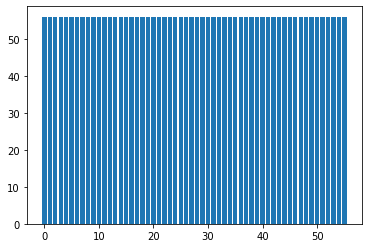

In [446]:
from matplotlib import pyplot
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()